<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [123]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [236]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [237]:
# Write your code here
print('data types of data set is :\n',df.dtypes)
print('Number of misisng value in columns of dataset are :',df.isnull().sum())

data types of data set is :
 ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
Number of misisng value in columns of dataset are : ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [238]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [242]:
# Write your code here
df['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [244]:
## Write your code here
df['Country'] = df['Country'].replace("Democratic People's Republic of Korea", 'North Korea') 
df['Country'] = df['Country'].replace('Republic of Korea', 'South Korea') 
df['Country'] = df['Country'].replace('Viet Nam', 'Vietnam')
df = df.dropna(subset=['Country'])
filter=df['Country'].str.contains('of...')
df=df[~filter]
df['Country'].unique()

array(['Canada', 'Norway', 'Uzbekistan', 'Serbia', 'Poland',
       'Philippines', 'Bulgaria', 'Switzerland', 'India', 'Germany',
       'Ireland', 'Italy', 'Ukraine', 'Australia', 'Brazil', 'Japan',
       'Austria', 'France', 'Saudi Arabia', 'Romania', 'Turkey', 'Nepal',
       'Algeria', 'Sweden', 'Netherlands', 'Croatia', 'Pakistan',
       'Czech Republic', 'Finland', 'Slovakia', 'Russian Federation',
       'Greece', 'Israel', 'Belgium', 'Mexico', 'Hungary', 'Argentina',
       'Portugal', 'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon',
       'Spain', 'South Africa', 'Lithuania', 'Vietnam',
       'Dominican Republic', 'Indonesia', 'Kosovo', 'Morocco', 'Taiwan',
       'Georgia', 'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria',
       'Liechtenstein', 'Denmark', 'Ecuador', 'Malaysia', 'Albania',
       'Azerbaijan', 'Chile', 'Ghana', 'Peru', 'Bolivia', 'Egypt',
       'Luxembourg', 'Montenegro', 'Cyprus', 'Paraguay', 'Kazakhstan',
       'Slovenia', 'Jordan', 'Costa Ric

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [246]:
## Write your code here'
df_encoded = pd.get_dummies(df, columns=['Employment'], prefix=['Employment'])
print(df_encoded.head())

    ResponseId                      MainBranch              Age RemoteWork  \
3            4           I am learning to code  18-24 years old        NaN   
4            5  I am a developer by profession  18-24 years old        NaN   
7            8           I am learning to code  18-24 years old        NaN   
9           10  I am a developer by profession  35-44 years old     Remote   
11          12  I am a developer by profession  45-54 years old  In-person   

     Check               CodingActivities  \
3   Apples                            NaN   
4   Apples                            NaN   
7   Apples                            NaN   
9   Apples       Bootstrapping a business   
11  Apples  Hobby;School or academic work   

                                              EdLevel  \
3   Some college/university study without earning ...   
4   Secondary school (e.g. American high school, G...   
7   Secondary school (e.g. American high school, G...   
9     Master’s degree (M.A., M.S

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [248]:
## Write your code here
missing_values = df.isnull().sum()
print(missing_values.idxmax(),'is a column with highest number of missing values.')

AINextMuch less integrated is a column with highest number of missing values.


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [250]:
## Write your code here
print('Before imputing missing values for ConvertedCompYearly, the number of missing value is',df['ConvertedCompYearly'].isnull().sum())
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)
print('After imputing missing values for ConvertedCompYearly, the number of missing value is',df['ConvertedCompYearly'].isnull().sum())

Before imputing missing values for ConvertedCompYearly, the number of missing value is 26833
After imputing missing values for ConvertedCompYearly, the number of missing value is 0


C:\Users\pangr\AppData\Local\Temp\ipykernel_31288\3597093726.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [252]:
## Write your code here
print('Before imputing missing values for RemoteWork',df['RemoteWork'].value_counts())
df['RemoteWork'].fillna(df['RemoteWork'].value_counts().idxmax(),inplace=True)
print('After imputing missing values for RemoteWork',df['RemoteWork'].value_counts())

Before imputing missing values for RemoteWork RemoteWork
Hybrid (some remote, some in-person)    16193
Remote                                  13100
In-person                                7525
Name: count, dtype: int64
After imputing missing values for RemoteWork RemoteWork
Hybrid (some remote, some in-person)    23379
Remote                                  13100
In-person                                7525
Name: count, dtype: int64


C:\Users\pangr\AppData\Local\Temp\ipykernel_31288\2297023040.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(df['RemoteWork'].value_counts().idxmax(),inplace=True)


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


<function matplotlib.pyplot.show(close=None, block=None)>

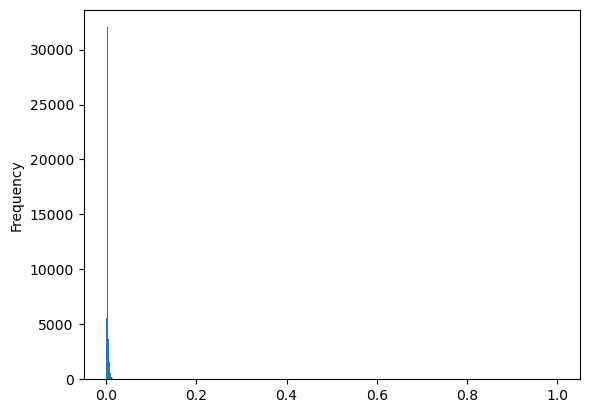

In [270]:
## Write your code here
import matplotlib.pyplot as plt
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)
df['ConvertedCompYearly'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
df['ConvertedCompYearly'].plot.hist(bins=500)
plt.show

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


<function matplotlib.pyplot.show(close=None, block=None)>

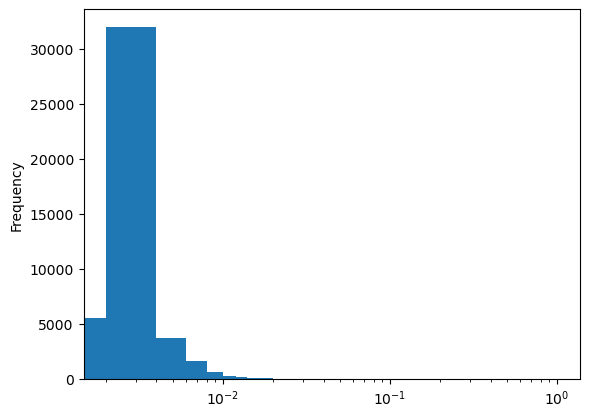

In [268]:
## Write your code here
df['ConvertedCompYearly'].plot.hist(bins=500)
plt.xscale('log')
plt.show


### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [175]:
## Write your code here
df['YearsCodePro'].unique()
df['YearsCodePro'].fillna(0, inplace=True)
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 0.5)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 51)
df['YearsCodePro'] = df['YearsCodePro'].astype(float)
df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins=[0, 2, 5, 10, float('inf')], labels=['Junior', 'Intermediate', 'Senior', 'Expert'])
df['ExperienceLevel'].value_counts()

C:\Users\pangr\AppData\Local\Temp\ipykernel_31288\153968641.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].fillna(0, inplace=True)


ExperienceLevel
Expert          12159
Senior           9301
Intermediate     8454
Junior           7608
Name: count, dtype: int64

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
